# IRA Facebook Posts

This is a small scratch space for examining various things in the Internet Research Agency Facebook posts that were released to Congress as evidence. The data used here was created as part of the [IRAds](https://mith.umd.edu/irads) project at the University of Maryland, who have made a dataset available for [download](https://mith.umd.edu/irads/data/).

First lets load the CSV file that we've already downloaded, unpacked and made available on the local filesystem.

In [2]:
import pandas

posts = pandas.read_csv('data/irads.csv', parse_dates=['created', 'ended'])
posts.head()

,url,identifier,title,description,image,currency,cost,created,ended,impressions,...,residence,match,location,politics,multicultural affinity,industry,employer,clicks,facebook url,tag
0,https://mith.umd.edu/irads/api/items/6456,3186,Black American racial experience is real…,Black American racial experience is real. We s...,https://mith.umd.edu/irads/files/original/f255...,RUB,1050.77,2016-11-14 12:10:27,NaT,396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,https://www.facebook.com/ProtectBIackGunOwners/,2nd Amendment|Black guns matter|civil rights|F...
1,https://mith.umd.edu/irads/api/items/6457,1084,The best costume for Halloween worth pos…,The best costume for Halloween worth posting. ...,https://mith.umd.edu/irads/files/original/f72d...,RUB,500.00,2016-11-03 15:10:07,2016-11-10 15:10:07,64032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11056,https://www.facebook.com/Blacktivist-128371547...,Anger|black|Blacktivist|civil rights|equality|...
2,https://mith.umd.edu/irads/api/items/6458,3135,Keep on whining and crying for your pres…,"Keep on whining and crying for your president,...",https://mith.umd.edu/irads/files/original/ccce...,RUB,69.00,2016-11-11 11:57:07,2016-11-14 11:57:07,4514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540,https://www.facebook.com/Woke-B|acks-294234600...,Anger|blacklivesmatter|brown|can't trust the C...
3,https://mith.umd.edu/irads/api/items/6459,3167,"End the whining and crying, end the riot…","End the whining and crying, end the riots with...",https://mith.umd.edu/irads/files/original/11f2...,RUB,25.39,2016-11-15 12:55:06,2016-11-16 12:55:06,566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,https://www.facebook.com/Woke-Blacks-294234600...,Anger|black|blacklivesmatter|can't trust the C...
4,https://mith.umd.edu/irads/api/items/6460,1139,Black girls are the definition of nation…,Black girls are the definition of national gre...,https://mith.umd.edu/irads/files/original/f178...,RUB,395.08,2016-11-30 15:15:04,2016-12-01 15:15:04,29629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4433,https://www.facebook.com/blacktivists/,black|Blacktivist|gender|race|racial identitie...


Now lets get the number of ads created by day

In [3]:
times = posts.resample('D', on='created')
times = pandas.DataFrame({'posts': times.identifier.count()})
times = times.reset_index()
times.head(10)

,created,posts
0,2015-06-09,1
1,2015-06-10,30
2,2015-06-11,0
3,2015-06-12,0
4,2015-06-13,0
5,2015-06-14,0
6,2015-06-15,0
7,2015-06-16,2
8,2015-06-17,2
9,2015-06-18,6


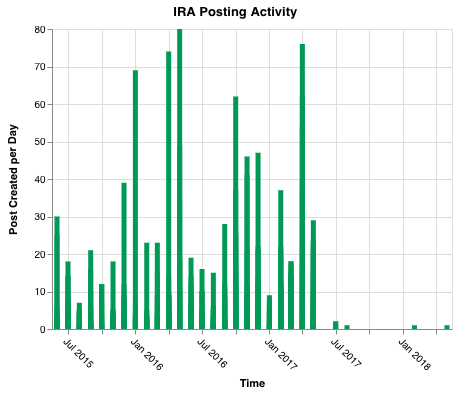

In [4]:
import altair

altair.renderers.enable('notebook')

chart = altair.Chart(times, title="IRA Posting Activity")
chart = chart.configure_axisX(labelAngle=45)

chart = chart.mark_bar().encode(
    altair.X('yearmonth(created):T', title="Time"),
    altair.Y('posts', title="Post Created per Day"),
)

chart = chart.configure_mark(color='#095')

chart


How many were sent before and after the election?

In [5]:
total = len(posts.index)
before = len(posts.query('created <= "2016-11-08"'))
pct_before = 100 * before / total

print("{0:,d} ({1:.2f}%) of the IRA posts released by Facebook were sent before the election.".format(before, pct_before))


1,754 (58.23%) of the IRA posts released by Facebook were sent before the election.
